***COVID-19 Clinical Trials ***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/My Drive/COVID19.csv', encoding='ISO-8859-1')
df

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,Unnamed: 27
0,1,NCT04785898,Diagnostic Performance of the ID Now? COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now? COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,09-Nov-20,22-Dec-20,30-Apr-21,08-Mar-21,NaN,08-Mar-21,"Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898,NaN
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,02-Nov-20,15-Dec-20,29-Jan-21,20-Oct-20,NaN,20-Oct-20,"Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136,NaN
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,07-May-20,15-Jun-21,15-Jun-21,20-May-20,NaN,09-Nov-20,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482,NaN
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,25-May-20,31-Jul-20,31-Aug-20,04-Jun-20,NaN,04-Jun-20,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061,NaN
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,05-May-20,May-21,May-21,20-May-20,NaN,04-Jun-20,"CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,5779,NCT04011644,Mobile Health for Alcohol Use Disorders in Cli...,NaN,Recruiting,No Results Available,Alcohol Drinking|Telemedicine,Behavioral: A-CHESS self-monitored|Behavioral:...,Number of risky drinking days|Number of patien...,"University of Wisconsin, Madison|National Inst...",...,23-Mar-20,Aug-22,Apr-23,08-Jul-19,NaN,02-Apr-21,"UW Health at the American Center, Madison, Wis...",NaN,https://ClinicalTrials.gov/show/NCT04011644,NaN
5782,5780,NCT04681339,Antibiotic Prescription in Children Hospitaliz...,NaN,Not yet recruiting,No Results Available,Community Acquired Pneumonia in Children|Antib...,Other: Antibiotic treatment|Other: No antibiot...,Antibiotic treatment rates in hospitalized chi...,ARCIM Institute Academic Research in Complemen...,...,Apr-21,Nov-24,Dec-24,23-Dec-20,NaN,10-Feb-21,"Die Filderklinik, Filderstadt, Baden-Württembe...",NaN,https://ClinicalTrials.gov/show/NCT04681339,NaN
5783,5781,NCT04740229,Moderate-intensity Flow-based Yoga Effects on ...,NaN,Recruiting,No Results Available,Stress|Psychological,Behavioral: Yoga,Perceived Stress|Task switching paradigm|Digit...,University of Illinois at Urbana-Champaign,...,10-Feb-21,Jul-21,Jul-21,05-Feb-21,NaN,24-Feb-21,"University of Illinois at Urbana-Champaign, Ur...",NaN,https://ClinicalTrials.gov/show/NCT04740229,NaN
5784,5782,NCT04804917,3-year Follow-up of the Mind My Mind RCT,MindMyMindFU,Recruiting,No Results Available,Emotional Problem|Anxiety Disorder of Childhoo...,NaN,The child's impact of mental health problems r...,"Mental Health

In [5]:
df.head(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,Unnamed: 27
0,1,NCT04785898,Diagnostic Performance of the ID Now? COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now? COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,09-Nov-20,22-Dec-20,30-Apr-21,08-Mar-21,NaN,08-Mar-21,"Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898,NaN
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,02-Nov-20,15-Dec-20,29-Jan-21,20-Oct-20,NaN,20-Oct-20,"Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136,NaN
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,07-May-20,15-Jun-21,15-Jun-21,20-May-20,NaN,09-Nov-20,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482,NaN
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,25-May-20,31-Jul-20,31-Aug-20,04-Jun-20,NaN,04-Jun-20,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061,NaN
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,05-May-20,May-21,May-21,20-May-20,NaN,04-Jun-20,"CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924,NaN


In [6]:
## EDA - Exploratory Data Analysis

In [7]:
df.shape

(5786, 28)

In [8]:
# Checking the types of the dataset
df.dtypes

,0
Rank,object
NCT Number,object
Title,object
Acronym,object
Status,object
Study Results,object
Conditions,object
Interventions,object
Outcome Measures,object
Sponsor/Collaborators,object


In [9]:
#Columns in the DataFrame
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL', 'Unnamed: 27'],
      dtype='object')

In [10]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5786 non-null   object 
 1   NCT Number               5783 non-null   object 
 2   Title                    5786 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3323 non-null   object 
 13  Enrollment               5748 non-null   float64
 14  Funded Bys              

In [11]:
# Statistical summary of dataset
df.describe()

,Enrollment
count,5.748000e+03
mean,1.832266e+04
std,4.045789e+05
min,0.000000e+00
25%,6.000000e+01
50%,1.710000e+02
75%,5.600000e+02
max,2.000000e+07


In [12]:
## Data Preprocessing

In [13]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)
object_datatype

['Rank',
 'NCT Number',
 'Title',
 'Acronym',
 'Status',
 'Study Results',
 'Conditions',
 'Interventions',
 'Outcome Measures',
 'Sponsor/Collaborators',
 'Gender',
 'Age',
 'Phases',
 'Funded Bys',
 'Study Type',
 'Study Designs',
 'Other IDs',
 'Start Date',
 'Primary Completion Date',
 'Completion Date',
 'First Posted',
 'Results First Posted',
 'Last Update Posted',
 'Locations',
 'Study Documents',
 'URL',
 'Unnamed: 27']

In [14]:
numerical_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_datatype.append(i)
numerical_datatype

['Enrollment']

In [15]:
# Lets check if our dataset is having any null or missing values.
df.isnull().sum()

,0
Rank,0
NCT Number,3
Title,0
Acronym,3306
Status,3
Study Results,3
Conditions,3
Interventions,889
Outcome Measures,38
Sponsor/Collaborators,3


<Axes: >

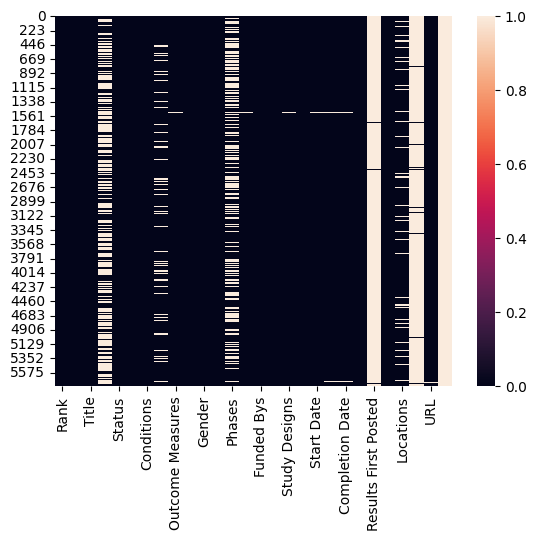

In [16]:
# Let us visualize the null values using heatmap:
sns.heatmap(df.isnull())

In [17]:
df.duplicated().sum() ##Checking duplicate values

0

In [18]:
df.nunique() ## Checking number of unique values in each column

,0
Rank,5786
NCT Number,5783
Title,5778
Acronym,2337
Status,12
Study Results,2
Conditions,3067
Interventions,4337
Outcome Measures,5686
Sponsor/Collaborators,3631


In [19]:
# Fill missing numerical values with the mean
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-19-d4c085c3c966>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-19-d4c085c3c966>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [20]:
df.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Acronym,0
Status,0
Study Results,0
Conditions,0
Interventions,0
Outcome Measures,0
Sponsor/Collaborators,0


In [21]:
# We have successfully filled all the missing values in our dataset.

In [22]:
## Statistical description

In [23]:
df.describe()

,Enrollment
count,5.786000e+03
mean,1.832266e+04
std,4.032479e+05
min,0.000000e+00
25%,6.000000e+01
50%,1.755000e+02
75%,5.990000e+02
max,2.000000e+07


In [24]:
print(df.describe(include='object'))

        Rank   NCT Number                                              Title  \
count   5786         5786                                               5786   
unique  5786         5783                                               5778   
top        1  NCT00571389  Study to Evaluate the Safety and Efficacy of V...   
freq       1            4                                                  2   

         Acronym      Status         Study Results Conditions  \
count       5786        5786                  5786       5786   
unique      2337          12                     2       3067   
top     COVID-19  Recruiting  No Results Available   COVID-19   
freq        3353        2808                  5750        723   

                 Interventions Outcome Measures  \
count                     5786             5786   
unique                    4337             5686   
top     Other: No intervention        Mortality   
freq                       921               43   

                 

In [28]:
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])
df['Study Type'] = label_encoder.fit_transform(df['Study Type'])

In [31]:
# Convert 'Completion Date' and 'Start Date' to datetime objects
# Specify a format to handle the 'May-21' format using '%b-%y'
# Handling errors by setting invalid parsing to NaT (Not a Time)
df['Completion Date'] = pd.to_datetime(df['Completion Date'], format='%b-%y', errors='coerce')
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%b-%y', errors='coerce')

# Now you can calculate the study duration
df['Study Duration'] = df['Completion Date'] - df['Start Date']

In [32]:
# Let us check the value counts of Study Results
df['Study Results'].value_counts()

,count
Study Results,
No Results Available,5750
Has Results,36


In [33]:
# Lets check all the statistical data
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Rank,5786,5786,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT Number,5786,5783,NCT00571389,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,5786,5778,Study to Evaluate the Safety and Efficacy of V...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acronym,5786,2337,COVID-19,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,5786.0,NaN,NaN,NaN,5.482371,0.0,3.0,7.0,7.0,11.0,2.441527
Study Results,5786,2,No Results Available,5750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conditions,5786,3067,COVID-19,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interventions,5786,4337,Other: No intervention,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outcome Measures,5786,5686,Mortality,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sponsor/Collaborators,5786,3631,Assistance Publique - Hôpitaux de Paris,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
## Data Visualization

Status
7     2808
3     1025
6     1004
0      526
4      181
11     107
10      74
8       27
2       19
5       12
1        2
9        1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

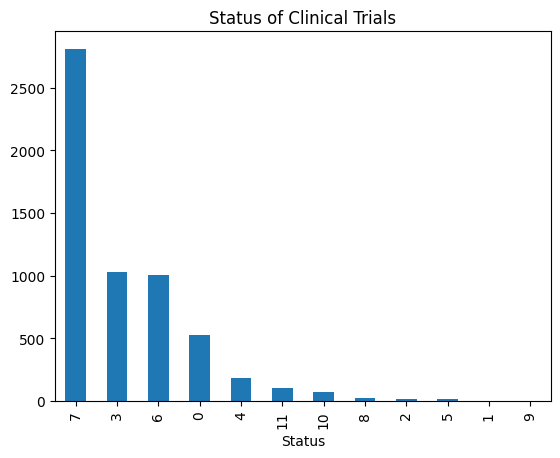

In [35]:
print(df['Status'].value_counts())
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')

Phases
Not Applicable                                         3817
Phase 2                                                 685
Phase 3                                                 450
Phase 1                                                 234
Phase 2|Phase 3                                         200
Phase 1|Phase 2                                         192
Phase 4                                                 161
Early Phase 1                                            46
16 Years to 100 Years   (Child, Adult, Older Adult)       1
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

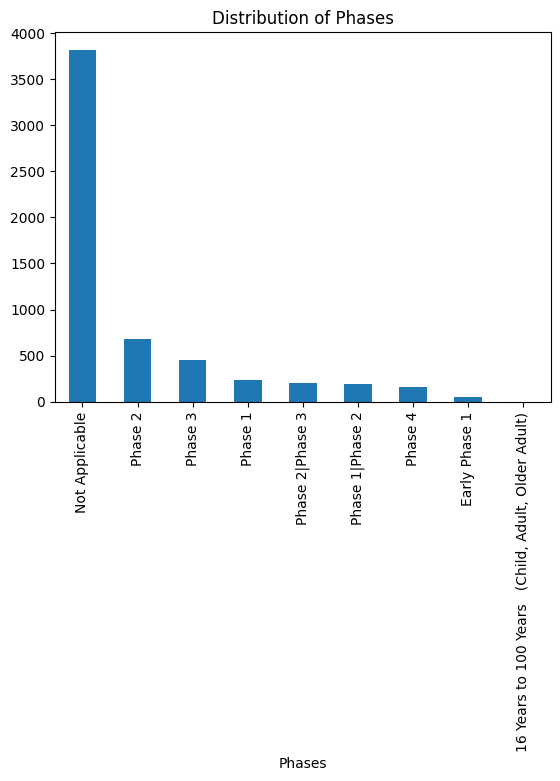

In [36]:
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar',title='Distribution of Phases')

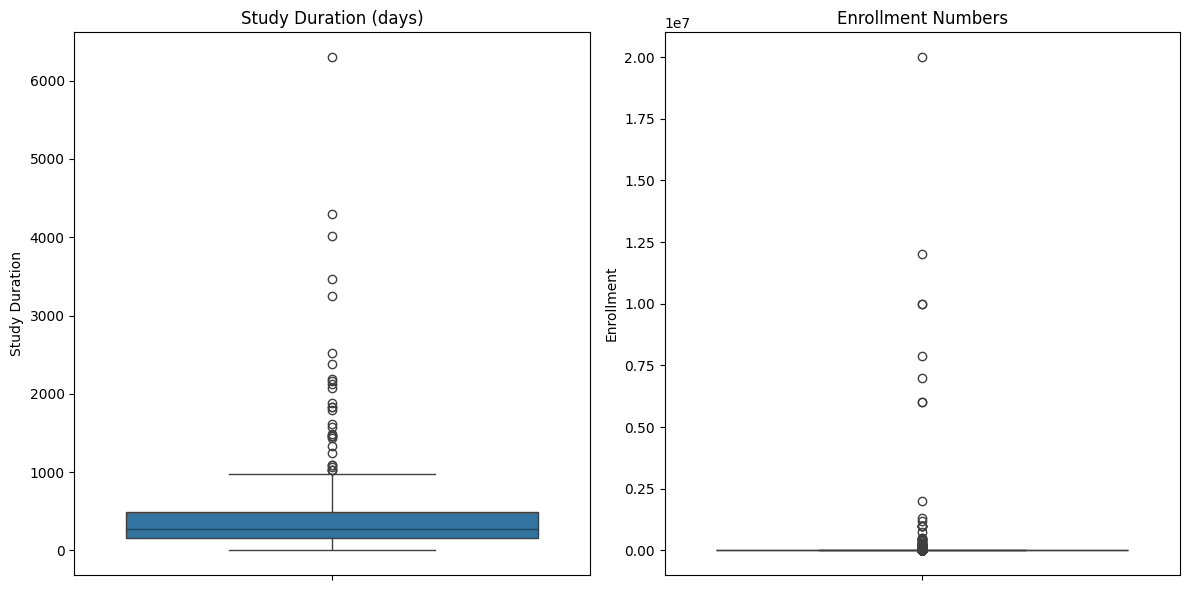

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Study Duration'].dt.days)  # Access days attribute
plt.title('Study Duration (days)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Enrollment'])  # Assuming you have a column named 'enrollment'
plt.title('Enrollment Numbers')


plt.tight_layout()
plt.show()

In [46]:
# Identify outliers in 'Study Duration'
Q1 = df['Study Duration'].dt.days.quantile(0.25)
Q3 = df['Study Duration'].dt.days.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_duration = df[(df['Study Duration'].dt.days < lower_bound) | (df['Study Duration'].dt.days > upper_bound)]
print("Outliers in Study Duration:\n", outliers_duration)

# Identify outliers in 'Enrollment'
Q1_enrollment = df['Enrollment'].quantile(0.25)
Q3_enrollment = df['Enrollment'].quantile(0.75)
IQR_enrollment = Q3_enrollment - Q1_enrollment
lower_bound_enrollment = Q1_enrollment - 1.5 * IQR_enrollment
upper_bound_enrollment = Q3_enrollment + 1.5 * IQR_enrollment

outliers_enrollment = df[(df['Enrollment'] < lower_bound_enrollment) | (df['Enrollment'] > upper_bound_enrollment)]
print("\nOutliers in Enrollment:\n", outliers_enrollment)


plt.tight_layout()
plt.show()

Outliers in Study Duration:
       Rank   NCT Number                                              Title  \
623    624  NCT04743908  Community Network-driven COVID-19 Testing of V...   
899    899  NCT04389359  PROphylaxis for paTiEnts at Risk of COVID-19 i...   
2579  2579  NCT04352803  Adipose Mesenchymal Cells for Abatement of SAR...   
2828  2828  NCT04730895  Isotretinoin (13- Cis-Retinoic Acid) Versus Sp...   
2910  2910  NCT04462848  Covid-19 Convalescent Plasma as Prevention and...   
3273  3273  NCT04726150  Effect of CoVid-19 (CoronaVirusDisease-19) and...   
3892  3892  NCT04372082  Hydroxychloroquine or Diltiazem-Niclosamide fo...   
3960  3960  NCT04673318  Physical Rehabilitation of COVID-19 Survivors ...   
4004  4004  NCT04558450  Covid-19 Effects on Arterial Stiffness and Vas...   
4175  4175  NCT04821908  Consequences of COVID 19 Pandemic on Childhood...   
4378  4378  NCT04406064   Viral Specific T-cells for Treatment of COVID-19   
4409  4409  NCT04581187  An Online-

<Figure size 640x480 with 0 Axes>

In [47]:
# Remove outliers from 'Study Duration'
df_no_outliers_duration = df[(df['Study Duration'].dt.days >= lower_bound) & (df['Study Duration'].dt.days <= upper_bound)]

# Remove outliers from 'Enrollment'
df_no_outliers_enrollment = df[(df['Enrollment'] >= lower_bound_enrollment) & (df['Enrollment'] <= upper_bound_enrollment)]

In [48]:
#Combined outlier removal
df_no_outliers = df[(df['Study Duration'].dt.days >= lower_bound) & (df['Study Duration'].dt.days <= upper_bound) & (df['Enrollment'] >= lower_bound_enrollment) & (df['Enrollment'] <= upper_bound_enrollment)]

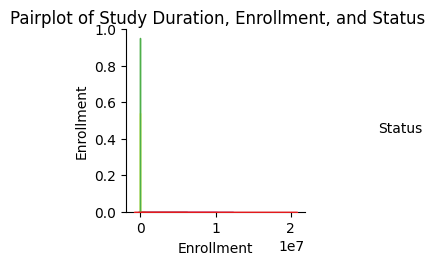

In [63]:
# Pairplot to visualize the relationships between numeric features
sns.pairplot(df[['Study Duration', 'Enrollment', 'Status']], hue='Status', palette="Set1")
plt.suptitle('Pairplot of Study Duration, Enrollment, and Status', y=1.02)
plt.show()

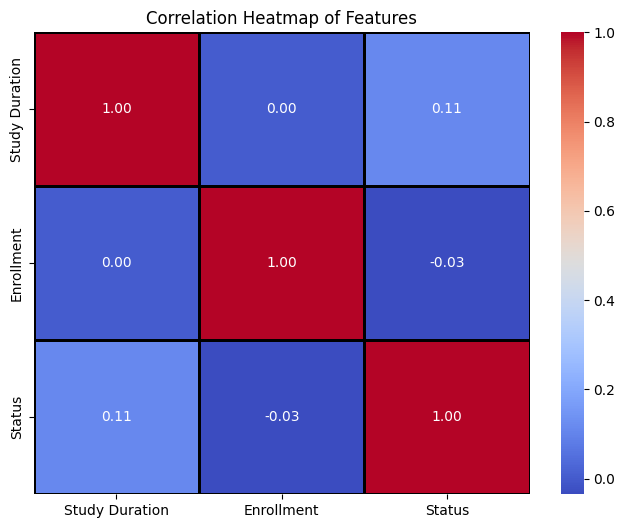

In [64]:
# Correlation heatmap to show relationships between numeric features
corr_matrix = df[['Study Duration', 'Enrollment', 'Status']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1, linecolor='black')
plt.title('Correlation Heatmap of Features')
plt.show()

<ipython-input-65-49c25fc6888f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Study Type', data=df, palette="Set2")


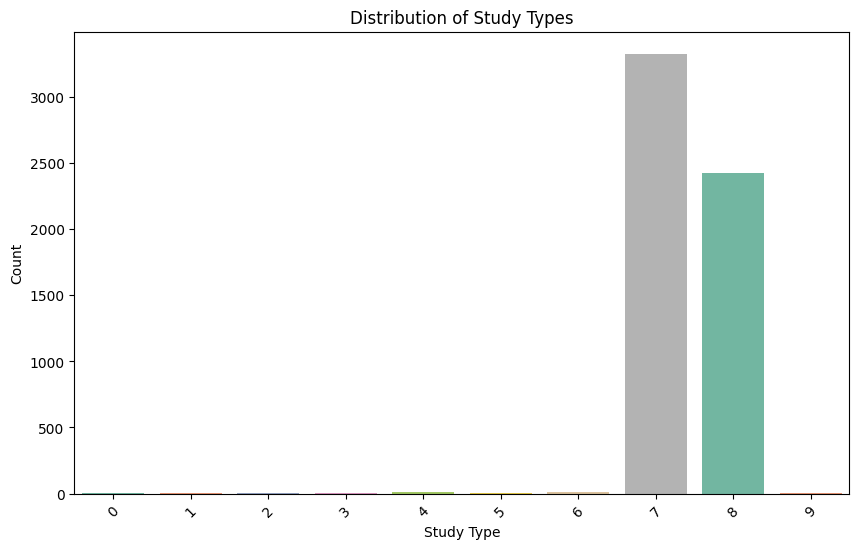

<ipython-input-65-49c25fc6888f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette="Set3")


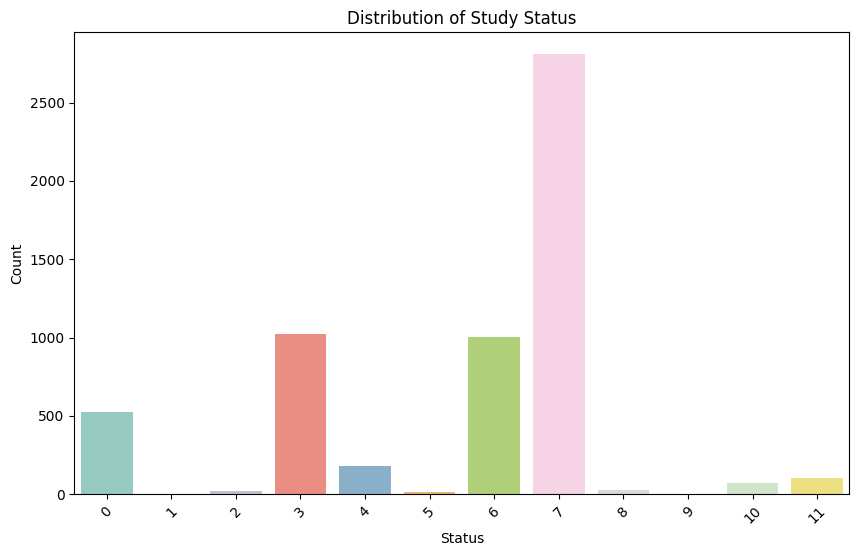

In [65]:
# Bar plot of categorical data
plt.figure(figsize=(10, 6))
sns.countplot(x='Study Type', data=df, palette="Set2")
plt.title('Distribution of Study Types')
plt.xlabel('Study Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot of Study Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df, palette="Set3")
plt.title('Distribution of Study Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

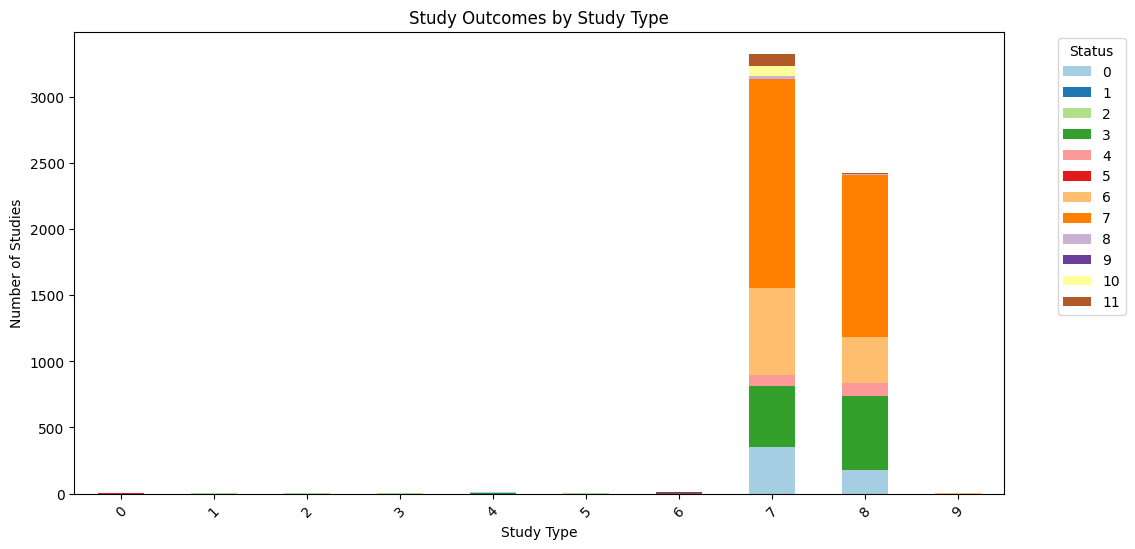

In [66]:
# Stacked bar chart to show outcomes by study type
study_status_counts = df.groupby(['Study Type', 'Status']).size().unstack()

study_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Paired")
plt.title('Study Outcomes by Study Type')
plt.xlabel('Study Type')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

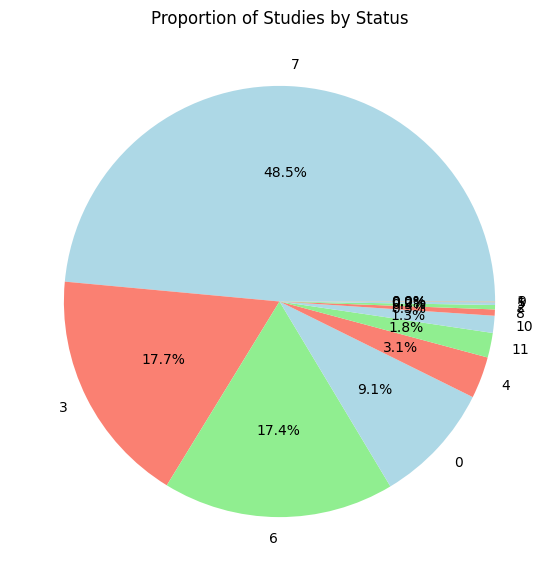

In [67]:
# Pie chart to visualize the status of studies
status_counts = df['Status'].value_counts()

plt.figure(figsize=(7, 7))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen'])
plt.title('Proportion of Studies by Status')
plt.ylabel('')
plt.show()

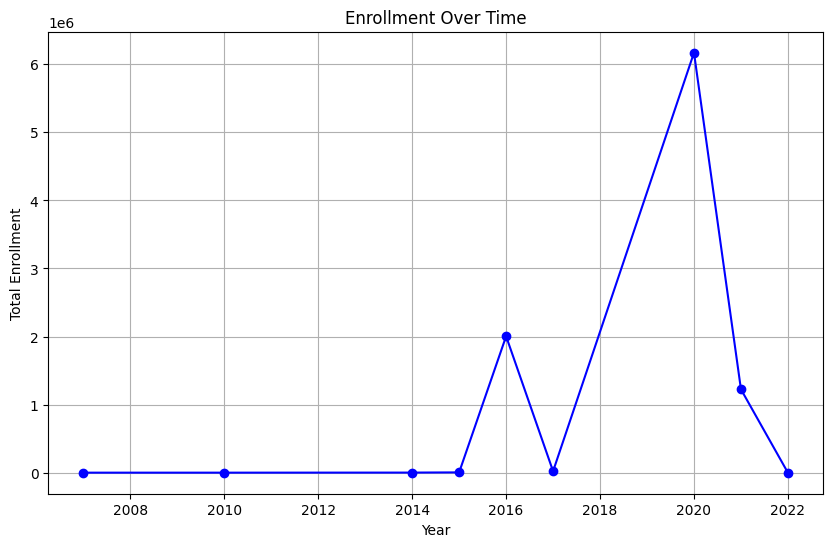

In [69]:
# Convert start date to datetime if not already
df['study_start_date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Group by year and sum the enrollment
df['year'] = df['study_start_date'].dt.year
enrollment_by_year = df.groupby('year')['Enrollment'].sum()

# Plot time series of enrollment by year
plt.figure(figsize=(10, 6))
enrollment_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.show()

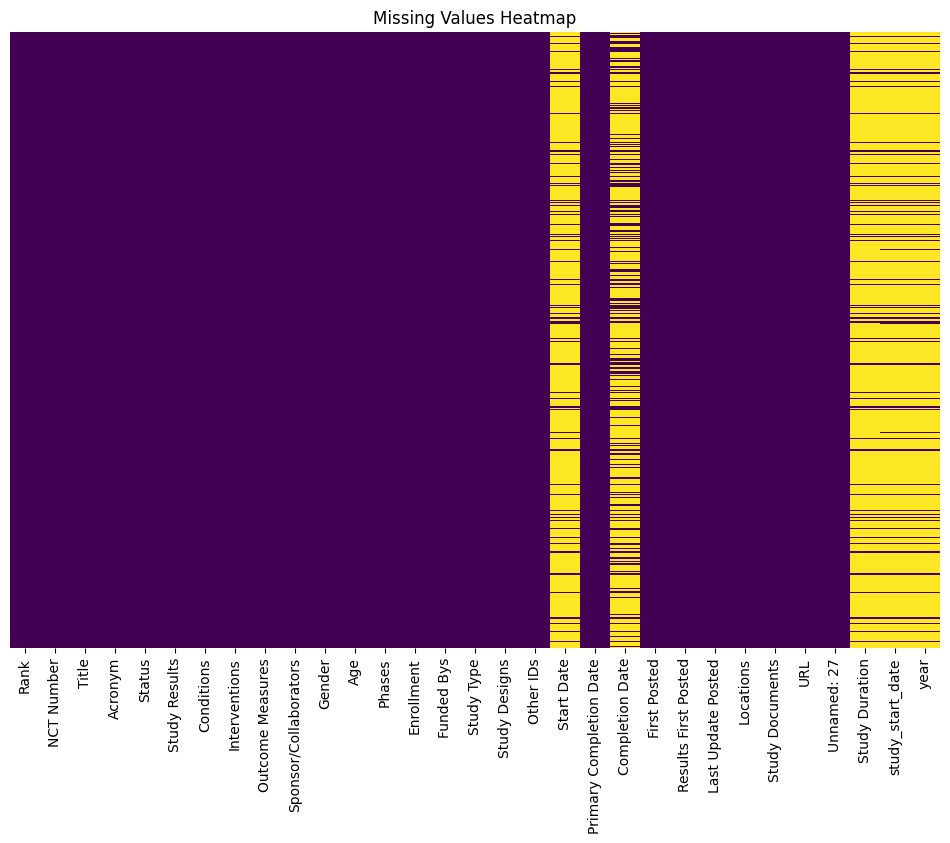

In [70]:
# Visualizing missing data with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [71]:
# Feature Engineering (example: using one-hot encoding for categorical features)
# Identify categorical columns (exclude already encoded ones like 'Status')
categorical_cols_to_encode = ['Study Type', 'Phases', 'Study Results'] # add others
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_cols_to_encode, drop_first=True)

In [72]:
# Feature Selection or dimensionality reduction (example using the most important features)
# You can use feature importance scores from a model to select important ones
# This is just an example you can use other techniques as well
# You can select a subset of important features
important_features = ['Enrollment', 'Study Duration'] + [col for col in df_encoded.columns if col.startswith(('Study Type_', 'Phases_', 'Study Results_'))]
df_selected = df_encoded[important_features + ['Status']]

In [73]:
# Data scaling
X = df_selected.drop('Status', axis=1)  # Features
y = df_selected['Status']  # Target variable

In [74]:
# Convert 'Study Duration' to numerical (e.g., days) before scaling
X['Study Duration'] = X['Study Duration'].dt.days

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [76]:
# Choose a model and train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.79      0.90      0.84        59
           7       0.00      0.00      0.00        14
          11       1.00      1.00      1.00         7

    accuracy                           0.75        80
   macro avg       0.45      0.47      0.46        80
weighted avg       0.67      0.75      0.71        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7625
              precision    recall  f1-score   support

           6       0.76      1.00      0.86        59
           7       0.00      0.00      0.00        14
          11       1.00      0.29      0.44         7

    accuracy                           0.76        80
   macro avg       0.59      0.43      0.44        80
weighted avg       0.65      0.76      0.67        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7375
              precision    recall  f1-score   support

           6       0.74      1.00      0.85        59
           7       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         7

    accuracy                           0.74        80
   macro avg       0.25      0.33      0.28        80
weighted avg       0.54      0.74      0.63        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.775
              precision    recall  f1-score   support

           6       0.80      0.93      0.86        59
           7       0.00      0.00      0.00        14
          11       1.00      1.00      1.00         7

    accuracy                           0.78        80
   macro avg       0.60      0.64      0.62        80
weighted avg       0.68      0.78      0.72        80



In [81]:
# Hyper Parameter Tuning:

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example using GridSearchCV with RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {accuracy_best_rf}")
print(classification_report(y_test, y_pred_best_rf))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy: 0.8516865079365079
Best Random Forest Accuracy: 0.8
              precision    recall  f1-score   support

           6       0.80      0.97      0.88        59
           7       0.00      0.00      0.00        14
          11       1.00      1.00      1.00         7

    accuracy                           0.80        80
   macro avg       0.60      0.66      0.63        80
weighted avg       0.68      0.80      0.73        80



<ipython-input-83-b3916cfc965d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


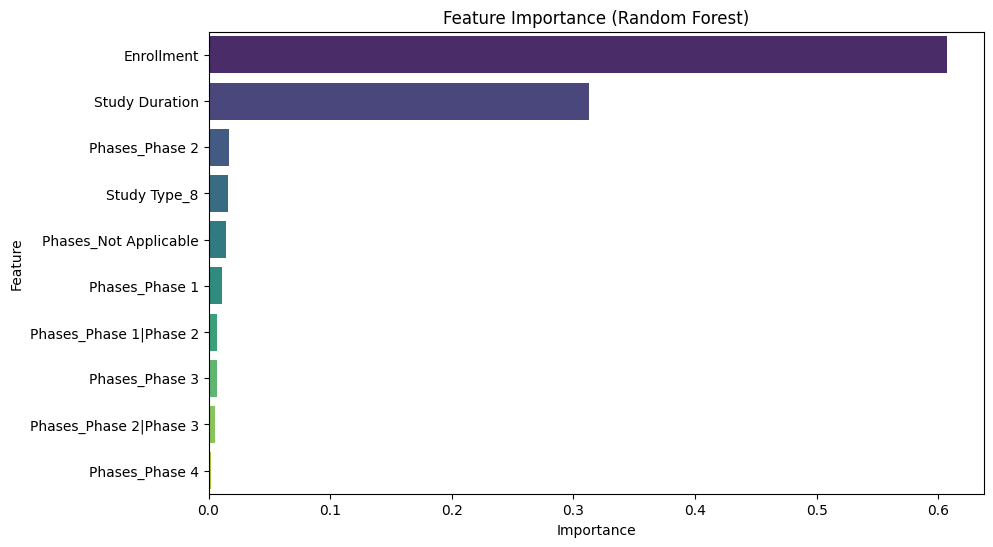

In [83]:
# Feature importance using Random Forest
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot the top features
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

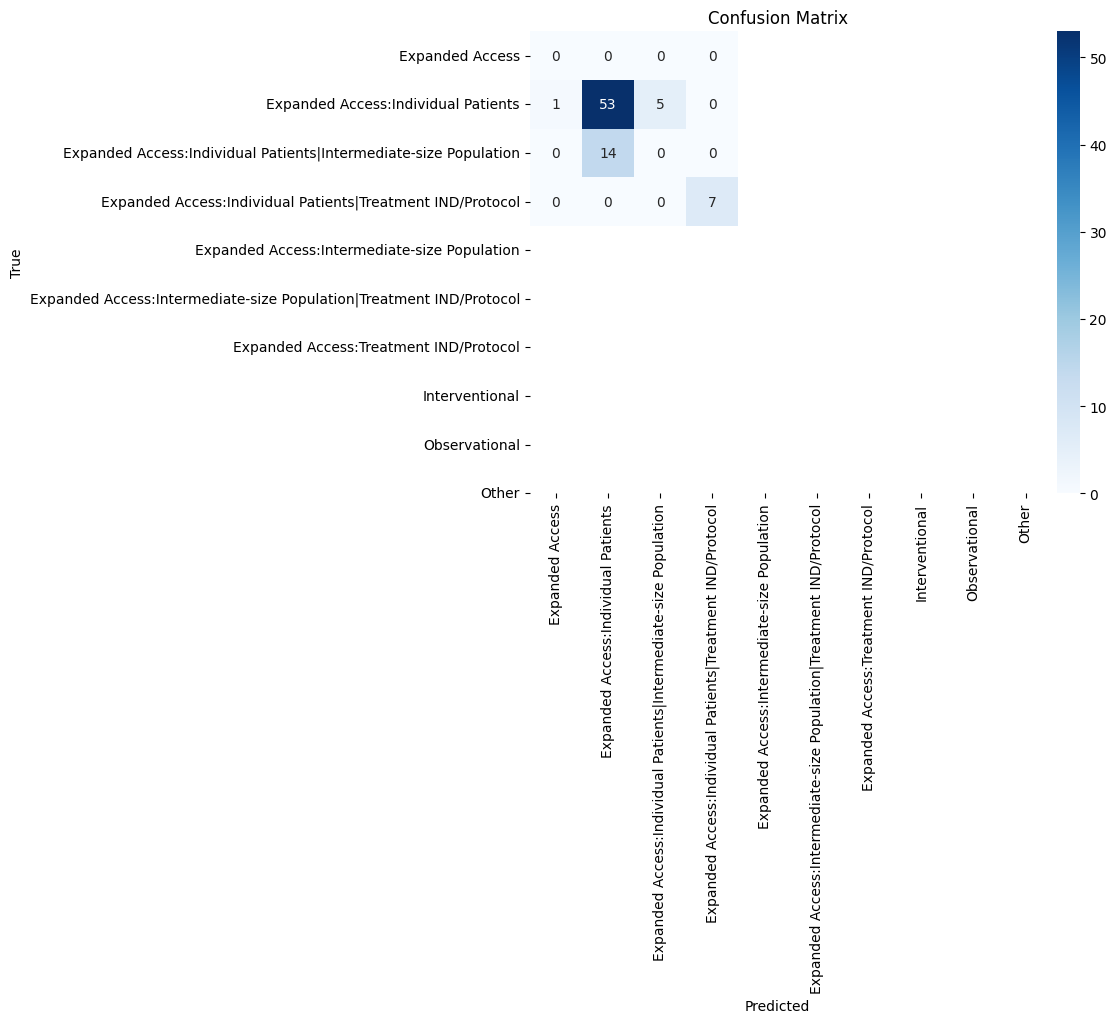

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [89]:
# Save the trained model
import pickle

filename = 'finalized_model.sav'
pickle.dump(best_rf_model, open(filename, 'wb'))

In [90]:
# Load the saved model (example)
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8


In [91]:
print("Model training and evaluation completed. The best performing model (Random Forest after hyperparameter tuning) has been saved.")
print("Further analysis can be performed by loading the saved model and making predictions on new data.")

Model training and evaluation completed. The best performing model (Random Forest after hyperparameter tuning) has been saved.
Further analysis can be performed by loading the saved model and making predictions on new data.
